## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## load datasets

In [9]:
cbcl = pd.read_csv('cbcl_1_5-2023-07-21.csv')
iq = pd.read_csv("iq-2023-07-21.csv")

basic = pd.read_csv("basic_medical_screening-2023-07-21.csv")
dcdq = pd.read_csv("dcdq-2023-07-21.csv")
vineland = pd.read_csv("vineland-3-2023-07-21.csv")
rbsr = pd.read_csv("rbsr-2023-07-21.csv")
scq = pd.read_csv("scq-2023-07-21.csv")

background = pd.read_csv("background_history_child-2023-07-21.csv")
core = pd.read_csv("core_descriptive_variables-2023-07-21.csv")
indi = pd.read_csv("individuals_registration-2023-07-21.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_9072\3082356719.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  dcdq = pd.read_csv("dcdq-2023-07-21.csv")
C:\Users\DELL\AppData\Local\Temp\ipykernel_9072\3082356719.py:11: DtypeWarning: Columns (22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  core = pd.read_csv("core_descriptive_variables-2023-07-21.csv")
C:\Users\DELL\AppData\Local\Temp\ipykernel_9072\3082356719.py:12: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  indi = pd.read_csv("individuals_registration-2023-07-21.csv")


## Merging of datasets with IQ data

- HFA, LFA
- ASD vs non ASD
- comorbidities
- age based distribution (months)

In [50]:
# single merges
iq_basic = pd.merge(iq, basic, on="subject_sp_id", how="inner")
iq_cbcl = pd.merge(iq, cbcl, on="subject_sp_id", how="inner")

iq_scq = pd.merge(iq, scq, on="subject_sp_id", how="inner")
iq_vineland = pd.merge(iq, vineland, on="subject_sp_id", how="inner")
iq_dcdq = pd.merge(iq, dcdq, on="subject_sp_id", how="inner")
iq_rbsr = pd.merge(iq, rbsr, on="subject_sp_id", how="inner")

# multi merge
iq_basic_cbcl = pd.merge(iq_basic, cbcl, on="subject_sp_id", how="inner")

In [62]:
frames = ['iq_basic', 'iq_cbcl', 'iq_scq', 'iq_vineland', 'iq_dcdq', 'iq_rbsr']

for df_name in frames:
    df = globals()[f'{df_name}']
    print(df_name, df.shape)

iq_basic (4182, 158)
iq_cbcl (129, 200)
iq_scq (3808, 80)
iq_vineland (1543, 111)
iq_dcdq (2543, 60)
iq_rbsr (3076, 90)


## IQ data (n=5966)

In [30]:
iq.shape

(5966, 26)

### High functioning autism subset in IQ data (total=5966, hfa=1302)

Including avg, high_avg and supe type intel_class

In [92]:
hfa_iq = iq[iq['intel_class'].isin(['avg','high_avg', 'supe'])]
hfa_iq.shape

(1302, 26)

### HFA subset in iq_basic data (total=4182, hfa=253)

In [91]:
hfa_iq_basic = iq_basic[iq_basic['intel_class'].isin(['high_avg', 'supe'])]
hfa_iq_basic.shape

(253, 158)

### ASD (asd=5638) vs non-ASD (no_asd=97,unknown=998) in IQ data

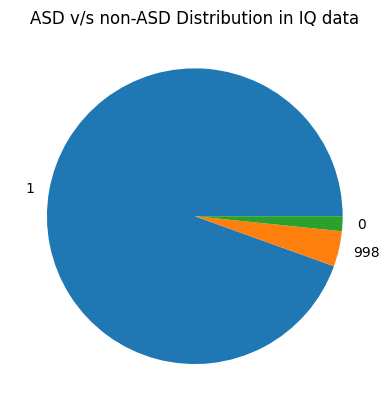

asd_verif
1      5638
998     231
0        97
Name: count, dtype: int64


In [42]:
# ASD vs non-ASD
asd_counts = iq['asd_verif'].value_counts()

plt.pie(asd_counts, labels=asd_counts.index)
plt.title("ASD v/s non-ASD Distribution in IQ data")
plt.show()

print(asd_counts)

### intel_class distribution in IQ data (detailed)

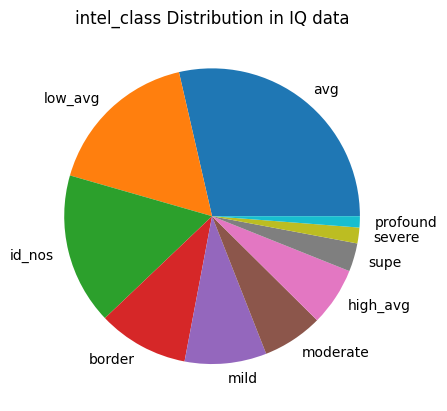

intel_class
avg         978
low_avg     580
id_nos      566
border      339
mild        306
moderate    226
high_avg    218
supe        106
severe       59
profound     42
Name: count, dtype: int64


In [43]:
iq_counts = iq['intel_class'].value_counts()

plt.pie(iq['intel_class'].value_counts(), labels=iq_counts.index)
plt.title("intel_class Distribution in IQ data")
plt.show()

print(iq_counts)

## Basic medical screening data (n=192557)

In [87]:
for element in basic.columns:
    print(element)

subject_sp_id
respondent_sp_id
family_sf_id
biomother_sp_id
biofather_sp_id
sex
current_depend_adult
asd
age_at_eval_months
age_at_eval_years
basic_medical_measure_validity_flag
attn_behav
behav_adhd
behav_conduct
behav_intermitt_explos
behav_odd
birth_def_bone
birth_def_bone_club
birth_def_bone_miss
birth_def_bone_polydact
birth_def_bone_spine
birth_def_cleft_lip
birth_def_cleft_palate
birth_def_cns
birth_def_cns_brain
birth_def_cns_myelo
birth_def_fac
birth_def_gastro
birth_def_gi_esoph_atres
birth_def_gi_hirschprung
birth_def_gi_intest_malrot
birth_def_gi_pylor_sten
birth_def_thorac
birth_def_thorac_cdh
birth_def_thorac_heart
birth_def_thorac_lung
birth_def_urogen
birth_def_urogen_hypospad
birth_def_urogen_renal
birth_def_urogen_renal_agen
birth_def_urogen_uter_agen
birth_def_oth_calc
birth_etoh_subst
birth_ivh
birth_oth_calc
birth_oxygen
birth_pg_inf
birth_prem
cog_med
dev_id
dev_lang
dev_lang_dis
dev_ld
dev_motor
dev_mutism
dev_soc_prag
dev_speech
eating_probs
eating_disorder
enco

In [90]:
basic.shape

(192557, 133)

### ASD vs non-ASD in IQ, basic, and IQ_basic data

**Conflict in data:** 228 entries in iq_basic have 'asd'=True and 'asd_verif'!=1

In [88]:
iq['asd_verif'].fillna(value=0)
iq['asd_verif'].value_counts()

asd_verif
1      5638
998     231
0        97
Name: count, dtype: int64

In [75]:
basic['asd'].value_counts()

asd
False    112926
True      79631
Name: count, dtype: int64

In [74]:
iq_basic['asd'].fillna(value=0)
iq_basic['asd'].value_counts()

asd
True    4182
Name: count, dtype: int64

In [82]:
iq_basic['asd_verif'].fillna(value=0)
iq_basic['asd_verif'].value_counts()

asd_verif
1      3954
998     159
0        69
Name: count, dtype: int64

In [94]:
# check for records where 'asd'==True but 'asd_verif'!=1

result = iq_basic[(iq_basic['asd'] == True) & (iq_basic['asd_verif'] != 1)]
result

,subject_sp_id,family_sf_id_x,test_year,age_test_date_months,test_type,intel_class,invalid,asd_verif,fsiq,fsiq_vers,...,sleep_dx,sleep_eat_toilet,sleep_probs,tics,visaud_blind,visaud_catar,visaud_deaf,visaud_strab,prev_study_calc,eval_year
32,SP0000565,SF0000528,2013,76.0,0.0,NaN,NaN,998,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2016
107,SP0005936,SF0005936,2017,70.0,0.0,NaN,NaN,998,das,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
109,SP0006250,SF0006250,2018,103.0,1.0,NaN,0.0,998,wasi,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
149,SP0011267,SF0011267,2013,71.0,1.0,avg,NaN,0,sb,5.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2016
171,SP0012746,SF0012713,2012,48.0,1.0,avg,NaN,0,wppsi,3.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,SP0491375,SF0491375,2019,629.0,1.0,id_nos,NaN,998,wasi,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
3975,SP0492349,SF0492349,2022,171.0,1.0,avg,0.0,0,wisc,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2022
4017,SP0499172,SF0499172,2021,161.0,1.0,NaN,0.0,0,wasi,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022
4054,SP0506396,SF0506396,2014,28.0,1.0,NaN,0.0,998,other,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2022


## Comorbidity analysis

In [68]:
parameters = ['behav_adhd','behav_conduct','behav_odd','behav_intermitt_explos','mood_anx','mood_bipol','mood_dep','mood_ocd']

# in the iq_basic data, how many are positive for each of the comorbidity parameters?

for para in parameters:
    iq_basic[para] = iq_basic[para].fillna(value=0)
    print(iq_basic[para].value_counts())

behav_adhd
0.0    2743
1.0    1439
Name: count, dtype: int64
behav_conduct
0.0    4122
1.0      60
Name: count, dtype: int64
behav_odd
0.0    3946
1.0     236
Name: count, dtype: int64
behav_intermitt_explos
0.0    4138
1.0      44
Name: count, dtype: int64
mood_anx
0.0    3393
1.0     789
Name: count, dtype: int64
mood_bipol
0.0    4133
1.0      49
Name: count, dtype: int64
mood_dep
0.0    3926
1.0     256
Name: count, dtype: int64
mood_ocd
0.0    3913
1.0     269
Name: count, dtype: int64


**What can I infer from this data?**

# Minimal dataset for calculating deriv_cog_imp (total_mini=1524, less5_mini=623)

NOTE: need to add Core descriptive variables(cognitive_impairment_latest) and

**Required parameters:**
- IQ dataset
    - subject_sp_id
    - fsiq < 80
    - nviq < 80
    - fsiq_ratio < 80
    - nviq_ratio < 80
    - intel_class ('profound', 'severe', 'moderate', 'mild', 'border', 'id_nos')
- Core descriptive variables
    - cognitive_impairment_latest
    - language_level_latest 
- Backgroud history child
    - cog_age_level == 'signif_below_age'
    - regress_lang_return_y_n
- DCDQ
    - motor_able = no
- Vineland
    - communication_standard < 80
- Basic Medical Screening
    - dev_lang
- Individuals registration
    - language_level_at_enrollment

In [27]:
# create a minimal df with only the required parameters
# the mandates are subject_id and deriv_cog_impair

# [1] merge all required datasets

# dfs = [iq, vineland, basic]
dfs = [iq, vineland, basic, cbcl, core, background, rbsr, dcdq, indi, scq]
mini = pd.merge(dfs[0], dfs[1], on='subject_sp_id', how="inner")

for df in dfs[2:]:
    mini = pd.merge(mini, df, on='subject_sp_id', how="inner")

mini['deriv_cog_impair'] = ''

In [86]:
# modified code to include more parameters for calculating cognitive impairment
dfs = [iq, vineland, basic, cbcl, core, background, rbsr, dcdq, indi, scq]
total = dfs[0].copy(deep=True)

suffixes = ['_' + str(i) for i in range(1, len(dfs))]

for df, sfx in zip(dfs[1:], suffixes):
    total = pd.merge(mini, df, on='subject_sp_id', how="left", suffixes=(sfx, ''))

In [87]:
mini.shape

(1524, 244)

In [28]:
less5 = mini[mini['age_test_date_months'] < 61]

In [74]:
# [2] keep only the required parameters
req_cols = ['subject_sp_id','asd_x','asd_verif','invalid','age_test_date_months','fsiq','nviq','fsiq_score','nviq_score','fsiq_ratio','nviq_ratio','intel_class','communication_standard','deriv_cog_impair']
less5 = less5[req_cols]

In [82]:
print("less5:", less5.shape)
print("mini:", mini.shape)

less5: (623, 14)
mini: (1524, 244)


In [83]:
for col in mini.columns:
    print(col)

subject_sp_id
family_sf_id_x
test_year
age_test_date_months
test_type
intel_class
invalid
asd_verif
fsiq
fsiq_vers
fsiq_other
fsiq_score
fsiq_floor
viq
viq_vers
viq_other
viq_score
viq_floor
nviq
nviq_vers
nviq_other
nviq_score
nviq_floor
fsiq_ratio
viq_ratio
nviq_ratio
respondent_sp_id_x
family_sf_id_y
sex_x
asd_x
current_depend_adult_x
age_at_eval_months_x
age_at_eval_years_x
abc_standard
communication_standard
dls_standard
soc_standard
motor_standard
abc_adaptive_level
abc_percentile
communication_adaptive_level
communication_percentile
express_v_score
express_raw_score
express_age
express_est
express_growth
receptive_v_score
receptive_raw_score
receptive_age
receptive_est
receptive_growth
written_v_score
written_raw_score
written_age
written_est
written_growth
dls_adaptive_level
dls_percentile
community_v_score
community_raw_score
community_age
community_est
community_growth
domestic_v_score
domestic_raw_score
domestic_age
domestic_est
domestic_growth
personal_v_score
personal_raw_

# Derived Cognitive Impairment Variable 

In [81]:
def check_cognitive_impairment(row):
    if row['invalid'] != 1:
        if pd.notnull(row['fsiq_score']) or pd.notnull(row['nviq_score']):
            if pd.notnull(row['fsiq_score']) and row['fsiq_score'] < 80:
                return 1
            elif pd.notnull(row['nviq_score']) and row['nviq_score'] < 80:
                return 1
            else:
                return 0
        elif pd.notnull(row['fsiq_ratio']) or pd.notnull(row['nviq_ratio']):
            if pd.notnull(row['fsiq_ratio']) and row['fsiq_ratio'] < 80:
                return 1
            elif pd.notnull(row['nviq_ratio']) and row['nviq_ratio'] < 80:
                return 1
            else:
                return 0
        elif row['intel_class'] in ['profound', 'severe', 'moderate', 'mild', 'border', 'id_nos']:
            return 1
        elif row['communication_standard'] < 80:
           return 1
        elif (row['cognitive_impairment_latest'] == 1): # core
            return 1
        elif (row['age_at_registration_years'] >= 4) and (row['language_level_latest'] != 'Uses longer sentences of his/her own and is able to tell you something that happened'):   # core
            return 1
        elif row['cog_age_level'] == 'signif_below_age' : 
            return 1
        elif row['cog_test_score'] in ['24_below', '25_39', '40_54', '55_69', '70_79']:  # background
            return 1
        elif (row['age_at_registration_months'] >= 60) and (row['motor_able'] != 1) and (row['dev_lang'] == 1):
            return 1
    return 0

# Apply the function to each row of the DataFrame
#mini['deriv_cog_impair'] = mini.apply(check_cognitive_impairment, axis=1)
less5['deriv_cog_impair'] = less5.apply(check_cognitive_impairment, axis=1)

KeyError: 'cognitive_impairment_latest'

In [234]:
less5

,subject_sp_id,asd_x,asd_verif,invalid,age_test_date_months,fsiq,nviq,fsiq_score,nviq_score,fsiq_ratio,nviq_ratio,intel_class,communication_standard,deriv_cog_impair
1,SP0000087,True,1,1.0,52.0,wppsi,NaN,82.0,97.0,NaN,NaN,low_avg,82,0
2,SP0000087,True,1,1.0,52.0,wppsi,NaN,82.0,97.0,NaN,NaN,low_avg,81,0
5,SP0000123,True,1,0.0,37.0,bsid,NaN,51.0,NaN,NaN,NaN,NaN,49,1
7,SP0000213,True,1,1.0,48.0,wppsi,NaN,101.0,98.0,NaN,NaN,avg,76,0
21,SP0001016,True,1,0.0,59.0,wppsi,NaN,133.0,117.0,NaN,NaN,supe,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,SP0532168,True,1,0.0,32.0,msel,NaN,49.0,NaN,NaN,NaN,id_nos,61,1
1513,SP0533355,True,1,0.0,29.0,msel,NaN,81.0,NaN,NaN,NaN,low_avg,97,0
1514,SP0533678,True,1,0.0,28.0,msel,NaN,51.0,NaN,NaN,NaN,low_avg,84,1
1521,SP0542399,True,1,0.0,27.0,msel,NaN,NaN,NaN,NaN,NaN,low_avg,49,1


In [32]:
# save CSV files
mini.to_csv("mini_1.csv", index=False)
less5.to_csv("less5_1.csv", index=False)

### Findings:
Based on fsiq and nviq (scores and ratios), and intel_class

In [173]:
mini['deriv_cog_impair'].value_counts()

deriv_cog_impair
0    842
1    682
Name: count, dtype: int64

In [193]:
less5['deriv_cog_impair'].value_counts()

deriv_cog_impair
1    385
0    238
Name: count, dtype: int64

**Inference**

- Now we have our dataset, with a computed cognitive impairment parameter.
- We have to see which parameters are available for this dataset, and choose a set of predictor variables.
- Then check how well pred_cog_impair compares to deriv_cog_impair.

# Dataset construction for Prediction Model

**Parameters to be used:**
- subject_sp_id
- deriv_cog_impair
- age_at_eval (for whichever test data is being used)

**Check overlap with datasets**
- CBCL
- SCQ
- Vineland
- DCDQ
- Basic Medical Screening

In [235]:
# check overlaps
less5_cbcl = pd.merge(less5, cbcl, on="subject_sp_id", how="inner")
less5_scq = pd.merge(less5, scq, on="subject_sp_id", how="inner")
less5_dcdq = pd.merge(less5, dcdq, on="subject_sp_id", how="inner")
less5_rbsr = pd.merge(less5, rbsr, on="subject_sp_id", how="inner")
less5_vineland = pd.merge(less5, vineland, on="subject_sp_id", how="inner")
less5_basic = pd.merge(less5, basic, on="subject_sp_id", how="inner")


print("less5_cbcl :", less5_cbcl.shape)
print("less5_scq :", less5_scq.shape)
print("less5_dcdq :", less5_dcdq.shape)
print("less5_rbsr :", less5_rbsr.shape)
print("less5_vineland :", less5_vineland.shape)
print("less5_basic :", less5_basic.shape)

less5_cbcl : (116, 188)
less5_scq : (613, 68)
less5_dcdq : (522, 48)
less5_rbsr : (609, 78)
less5_vineland : (661, 99)
less5_basic : (623, 146)


#### Does vineland data have duplicate rows? Why does less5_vineland have more rows than less5?
YES. It has 661 rows, instead of 623 rows in less5.
Vineland original data has 690 duplicate rows.

In [236]:
# does vineland have duplicate rows?

duplicate_rows = vineland.duplicated(subset=['subject_sp_id'], keep=False)
duplicate_df = vineland[duplicate_rows]

print("no of duplicate rows:", duplicate_df.shape)

no of duplicate rows: (690, 86)


**Drop duplicate rows from Vineland-3 data, keeping only the latest entry for each subject**

In [237]:
max_age_idx = vineland.groupby('subject_sp_id')['age_at_eval_months'].idxmax()
vineland_max_age = vineland.loc[max_age_idx]

print("original vineland:", vineland.shape)
print("max age vineland:", vineland_max_age.shape)

original vineland: (23160, 86)
max age vineland: (22815, 86)


In [238]:
less5_vineland = pd.merge(less5, vineland_max_age, on="subject_sp_id", how="inner")
print("overlap b/w less5 and vineland_max_age",less5_vineland.shape)

overlap b/w less5 and vineland_max_age (623, 99)


# MODEL dataset

### Construction of dataset

In [49]:
dfs = [iq, vineland, basic, cbcl, core, background, rbsr, dcdq, indi, scq]
total = dfs[0].copy(deep=True)

suffixes = ['_' + str(i) for i in range(1, len(dfs))]

for df, sfx in zip(dfs[1:], suffixes):
    total = pd.merge(total, df, on='subject_sp_id', how="left", suffixes=(sfx, ''))

In [48]:
total.shape  # inner join

(59, 770)

In [50]:
total.shape # left join

(6008, 770)

In [51]:
# extract parameters

model_para = [
    # 
    "subject_sp_id",
    # BACKGROUND --------------
    "age_onset_mos",
    "cog_age_level",   # ENCODING
    "family_hx_asd_mat_aunt_uncle",
    "father_highest_education",
    "fed_self_spoon_age_mos",
    "function_age_level",   # ENCODING
    "hand",
    "intervention_counseling",
    "intervention_medication",
    "intervention_ot_fine_mot",
    "intervention_ot_sensory",
    "intervention_social_skills",
    "intervention_speech_language",
    "language_age_level",   # ENCODING
    "mother_highest_education",
    "onset_concern",
    "plateau_y_n",
    "regress_lang_return_y_n",
    "regress_lang_time_return",
    "regress_lang_y_n",
    "repeat_grade",
    "smiled_age_mos",
    "sped_504",
    "sped_aide",
    "sped_asd_class_ft",
    "sped_birth_to_three",
    "sped_iep_asd",
    "sped_iep_other",
    "sped_ot",
    "sped_other",
    "sped_other_class_ft",
    "sped_other_class_pt",
    "sped_preschool",
    "sped_priv_asd",
    "sped_pt",
    "sped_soc_skills",
    "sped_speech",
    "sped_y_n",
    "support_require",
    # 
    # SCQ -----------
    "q01_phrases",
    "q02_conversation",
    "q04_inappropriate_question",
    "q06_invented_words",
    "q09_expressions_appropriate",
    "q10_hand_tool",
    "q13_interests_intensity",
    "q14_senses",
    "q18_objects_carry",
    "q20_talk_friendly",
    "q21_copy_you",
    "q22_point_things",
    "q23_gestures_wanted",
    "q24_nod_head",
    "q25_shake_head",
    "q26_look_directly",
    "q28_things_interested",
    "q29_share",
    "q30_join_enjoyment",
    "q31_comfort",
    "q32_help_attention",
    "q33_range_expressions",
    "q35_make_believe",
    "q36_same_age",
    "q38_pay_attention",
    # 
    # DCDQ --------------------------
    "q02_catch_ball",
    "q05_run_fast_similar",
    "q06_plan_motor_activity",
    "q09_appropriate_tension_printing_writing",
    "q10_cuts_pictures_shapes",
    "q11_likes_sports_motors_skills",
    "q13_quick_competent_tidying_up",
    "fine_motor_handwriting",
    #
    # basic medical screening --------------
    "dev_id",
    "dev_lang_dis",
    "mood_or_anx",
    "neuro_oth_calc",
    # 
    # individuals registration -------------
    "diagnosis_age",
    "ASD_services",
    "iep_asd",
    "cognitive_impairment_at_enrollment",   # ENCODING
    "language_level_at_enrollment"   # ENCODING
]


total = total[model_para]

In [59]:
total.shape

(6008, 82)

In [38]:
for col in total.columns:
    print(col)

subject_sp_id
age_onset_mos
cog_age_level
family_hx_asd_mat_aunt_uncle
father_highest_education
fed_self_spoon_age_mos
function_age_level
hand
intervention_counseling
intervention_medication
intervention_ot_fine_mot
intervention_ot_sensory
intervention_social_skills
intervention_speech_language
language_age_level
mother_highest_education
onset_concern
plateau_y_n
regress_lang_return_y_n
regress_lang_time_return
regress_lang_y_n
repeat_grade
smiled_age_mos
sped_504
sped_aide
sped_asd_class_ft
sped_birth_to_three
sped_iep_asd
sped_iep_other
sped_ot
sped_other
sped_other_class_ft
sped_other_class_pt
sped_preschool
sped_priv_asd
sped_pt
sped_soc_skills
sped_speech
sped_y_n
support_require
q01_phrases
q02_conversation
q04_inappropriate_question
q06_invented_words
q09_expressions_appropriate
q10_hand_tool
q13_interests_intensity
q14_senses
q18_objects_carry
q20_talk_friendly
q21_copy_you
q22_point_things
q23_gestures_wanted
q24_nod_head
q25_shake_head
q26_look_directly
q28_things_interested


In [88]:
total.to_csv('total.csv', index=False)

In [89]:
final.to_csv('final.csv', index=False)

### Combining predictor dataset with deriv_cog_impair dataset

In [60]:
final = total.merge(less5[['subject_sp_id', 'deriv_cog_impair']], on='subject_sp_id', how='left')

In [56]:
final.shape # inner join

(59, 97)

In [61]:
final.shape # left join

(6062, 83)

In [63]:
less5.shape

(623, 14)

In [62]:
total.shape

(6008, 82)

In [90]:
for col in final.columns:
    print(col)

subject_sp_id
age_onset_mos
cog_age_level
family_hx_asd_mat_aunt_uncle
father_highest_education
fed_self_spoon_age_mos
function_age_level
hand
intervention_counseling
intervention_medication
intervention_ot_fine_mot
intervention_ot_sensory
intervention_social_skills
intervention_speech_language
language_age_level
mother_highest_education
onset_concern
plateau_y_n
regress_lang_return_y_n
regress_lang_time_return
regress_lang_y_n
repeat_grade
smiled_age_mos
sped_504
sped_aide
sped_asd_class_ft
sped_birth_to_three
sped_iep_asd
sped_iep_other
sped_ot
sped_other
sped_other_class_ft
sped_other_class_pt
sped_preschool
sped_priv_asd
sped_pt
sped_soc_skills
sped_speech
sped_y_n
support_require
q01_phrases
q02_conversation
q04_inappropriate_question
q06_invented_words
q09_expressions_appropriate
q10_hand_tool
q13_interests_intensity
q14_senses
q18_objects_carry
q20_talk_friendly
q21_copy_you
q22_point_things
q23_gestures_wanted
q24_nod_head
q25_shake_head
q26_look_directly
q28_things_interested


### Missing values in final dataset

Only 59 rows ar obtained after we have combined all the required datasets?

How can we increase the no of entries? 
Should we allow some entries to remain empty for some subjects, and then apply some form of imputation?

In [64]:
# check missing data in left joined final dataset

blank_entries_per_column = {}

# Iterate over each column
for column in final.columns:
    # Count the number of blank entries in the column
    blank_entries_count = final[column].isnull().sum()
    
    # Add the column name and corresponding count of blank entries to the dictionary
    blank_entries_per_column[column] = blank_entries_count

# Print the dictionary containing column names and corresponding counts of blank entries
for column, count in blank_entries_per_column.items():
    print(f"Column '{column}': {count} blank entries")

Column 'subject_sp_id': 0 blank entries
Column 'age_onset_mos': 2860 blank entries
Column 'cog_age_level': 2928 blank entries
Column 'family_hx_asd_mat_aunt_uncle': 5877 blank entries
Column 'father_highest_education': 2899 blank entries
Column 'fed_self_spoon_age_mos': 2990 blank entries
Column 'function_age_level': 2866 blank entries
Column 'hand': 2849 blank entries
Column 'intervention_counseling': 5017 blank entries
Column 'intervention_medication': 4621 blank entries
Column 'intervention_ot_fine_mot': 4179 blank entries
Column 'intervention_ot_sensory': 4579 blank entries
Column 'intervention_social_skills': 5214 blank entries
Column 'intervention_speech_language': 3836 blank entries
Column 'language_age_level': 2871 blank entries
Column 'mother_highest_education': 2854 blank entries
Column 'onset_concern': 2870 blank entries
Column 'plateau_y_n': 2853 blank entries
Column 'regress_lang_return_y_n': 5096 blank entries
Column 'regress_lang_time_return': 5399 blank entries
Column '

# Experimental IQ data

In [ ]:
# check overlap between exp_iq data and other datasets i.e. iq and basic

iq_basic['asd'].fillna(value=0)


In [70]:
exp_id = pd.read_csv("predicted_iq_experimental-2023-07-21.csv")

In [77]:
print("total entries:", exp_id.shape)

total entries: (49621, 8)


In [69]:
exp_id = exp_id[exp_id['derived_cog_impair'].notna()]
print("derived_cog_impair counts: ", exp_id.shape)

derived_cog_impair counts:  (108801, 8)


In [71]:
exp_id = exp_id[exp_id['ml_predicted_cog_impair'].notna()]
print("ml_predicted_cog_impair counts: ", exp_id.shape)

ml_predicted_cog_impair counts:  (49621, 8)


In [78]:
print("individual reg:", indi.shape)

individual reg: (328974, 45)


# 26/03

why is the no of datapoints in exp iq data so much more than less5 or mini?

what are the metrics being used in the reference paper?
- AUC score

In [91]:
temp = final.iloc[:, 1:81].copy()

In [92]:
temp.shape

(6062, 80)

### XGBClassifier

In [1]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


def load_data():
    df = pd.read_csv('final.csv')

    # drop rows where target variable deriv_cog_impair is missing
    df = df.dropna(subset=['deriv_cog_impair'])


    # Identify categorical columns
    categorical_columns = ['cog_age_level', 'father_highest_education', 'function_age_level', 'hand', 'language_age_level',
                       'mother_highest_education', 'onset_concern', 'regress_lang_time_return', 'support_require',
                       'ASD_services', 'iep_asd', 'cognitive_impairment_at_enrollment', 'language_level_at_enrollment']

    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, columns=categorical_columns)

    # Separate features and target variable
    X = df_encoded.drop(columns=['subject_sp_id','deriv_cog_impair']) 
    y = df_encoded['deriv_cog_impair']

    return X, y


def create_model(eval_metrics):
    return XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric=eval_metrics, early_stopping_rounds=5)


def main():
    X, y = load_data()

    # Perform cross validation (manually, using a for loop, for finer control)
    # place the entire block of dividing datasets, model fitting, and testing within loop

    k = 10

    eval_metrics = ["auc"]
    results = []

    # Loop over each fold
    for i in range(k):
        # Split data into training and test sets for current fold
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=i)

        eval_set = [(X_train, y_train), (X_val, y_val)]

        # Create and fit model for current fold
        model = create_model(eval_metrics)
        model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

        # Evaluate model on test set for current fold
        score = model.score(X_test, y_test)
        results.append(score)
    
    # Calculate average score and standard deviation
    avg_auc_score = np.mean(results)
    std_dev = np.std(results)

    print("\n AUC scores: \n")

    print(f"Average score: {avg_auc_score}")
    print(f"Standard deviation: {std_dev}")


if __name__ == "__main__":
    main()

FileNotFoundError: [Errno 2] No such file or directory: 'final.csv'

## SVC

In [99]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def load_data():
    df = pd.read_csv('final.csv')

    # Drop rows where target variable 'deriv_cog_impair' is missing
    df = df.dropna(subset=['deriv_cog_impair'])

    # Identify categorical columns
    categorical_columns = ['cog_age_level', 'father_highest_education', 'function_age_level', 'hand',
                            'language_age_level', 'mother_highest_education', 'onset_concern',
                            'regress_lang_time_return', 'support_require', 'ASD_services', 'iep_asd',
                            'cognitive_impairment_at_enrollment', 'language_level_at_enrollment']

    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, columns=categorical_columns)

    # Separate features and target variable
    X = df_encoded.drop(columns=['subject_sp_id', 'deriv_cog_impair'])
    y = df_encoded['deriv_cog_impair']

    return X, y


def create_model():
    return SVC(kernel='rbf', probability=True)  # Use radial basis function kernel


def main():
    X, y = load_data()

    # Perform cross validation (manually, using a for loop, for finer control)
    k = 10
    results = []

    # Loop over each fold
    for i in range(k):
        # Split data into training and test sets for current fold
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        # Create and fit model for current fold
        model = create_model()
        model.fit(X_train, y_train)

        # Evaluate model on test set for current fold
        score = model.score(X_test, y_test)
        results.append(score)

    # Calculate average score and standard deviation
    avg_score = np.mean(results)
    std_dev = np.std(results)

    print("\nAccuracy scores: \n")
    print(f"Average score: {avg_score}")
    print(f"Standard deviation: {std_dev}")


if __name__ == "__main__":
    main()


ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Final dataset (Reference replication; Ready-to-Import)

In [ ]:
df = pd.read_csv('final.csv')

# Drop rows where target variable 'deriv_cog_impair' is missing
df = df.dropna(subset=['deriv_cog_impair'])

# Identify categorical columns
categorical_columns = ['cog_age_level', 'father_highest_education', 'function_age_level', 'hand',
                        'language_age_level', 'mother_highest_education', 'onset_concern',
                        'regress_lang_time_return', 'support_require', 'ASD_services', 'iep_asd',
                        'cognitive_impairment_at_enrollment', 'language_level_at_enrollment']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target variable
X = df_encoded.drop(columns=['subject_sp_id', 'deriv_cog_impair'])
y = df_encoded['deriv_cog_impair']

In [2]:
# print the parameters in X to check syntax


In [3]:
# drop the unwanted columns


## Create a version with imputation (for non-XGB models)